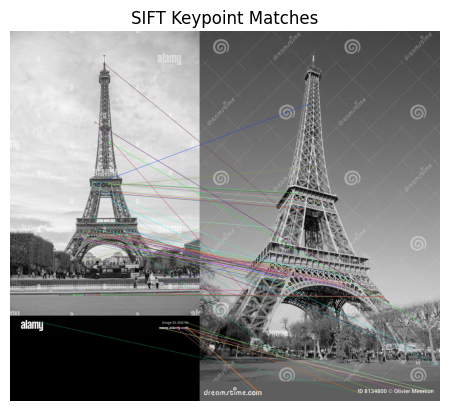

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img1 = cv2.imread('C:\CV TA\images\Eiffel_Tower_Front.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('C:\CV TA\images\Eiffel_Tower_Side.jpg', cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
img_match = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
plt.imshow(img_match)
plt.title("SIFT Keypoint Matches")
plt.axis('off')
plt.show()


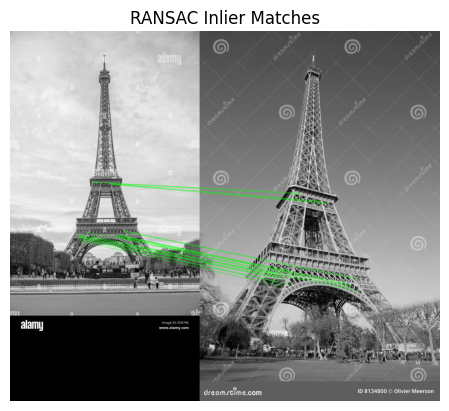

In [7]:
src_pts = np.float32([kp1[m[0].queryIdx].pt for m in good]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1,1,2)
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = [[m] for m in mask.ravel().tolist()]  # ✅ fix

img_ransac = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good, None,
    matchColor=(0, 255, 0),
    matchesMask=matchesMask,
    flags=2
)

plt.imshow(img_ransac)
plt.title("RANSAC Inlier Matches")
plt.axis('off')
plt.show()


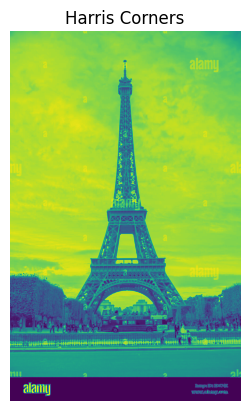

In [11]:
gray = cv2.imread('C:\CV TA\images\Eiffel_Tower_Front.jpg', cv2.IMREAD_GRAYSCALE)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
img_harris = cv2.imread('C:\CV TA\images\Eiffel_Tower_Front.jpg')
img_harris[dst > 0.01 * dst.max()] = [0, 0, 255]
plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2GRAY))
plt.title("Harris Corners")
plt.axis('off')
plt.show()
